# Countries, Flags and Happiness

This notebook explores the relationship between countries' flag features and their happiness scores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
happiness_df = pd.read_csv('WorldHappiness.csv')
flags_df = pd.read_csv('flags.csv', sep=';')

happiness_df['Country'] = happiness_df['Country'].str.strip().str.lower()
flags_df['name'] = flags_df['name'].str.strip().str.lower()

merged_df = pd.merge(happiness_df, flags_df, left_on='Country', right_on='name', how='inner')
merged_df.columns = merged_df.columns.str.strip()

print(f"Merged shape: {merged_df.shape}")


Merged shape: (104, 43)


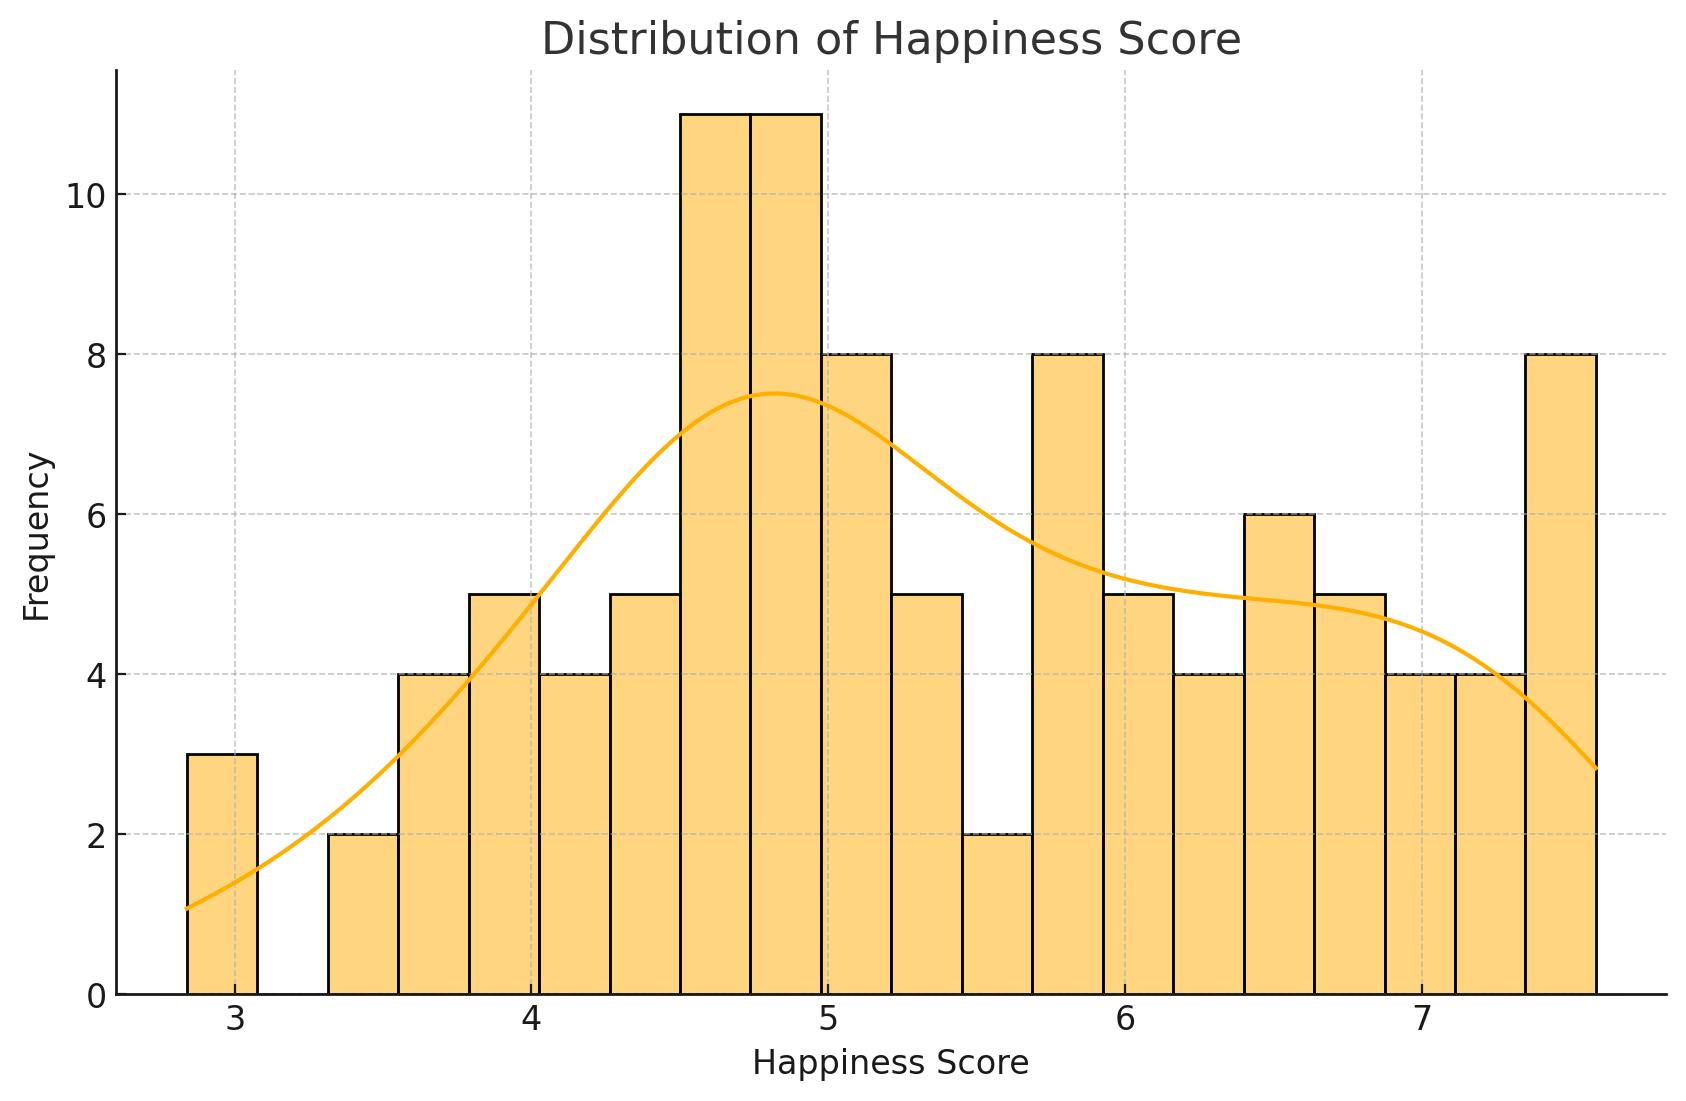

In [3]:
sns.histplot(merged_df['Happiness Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


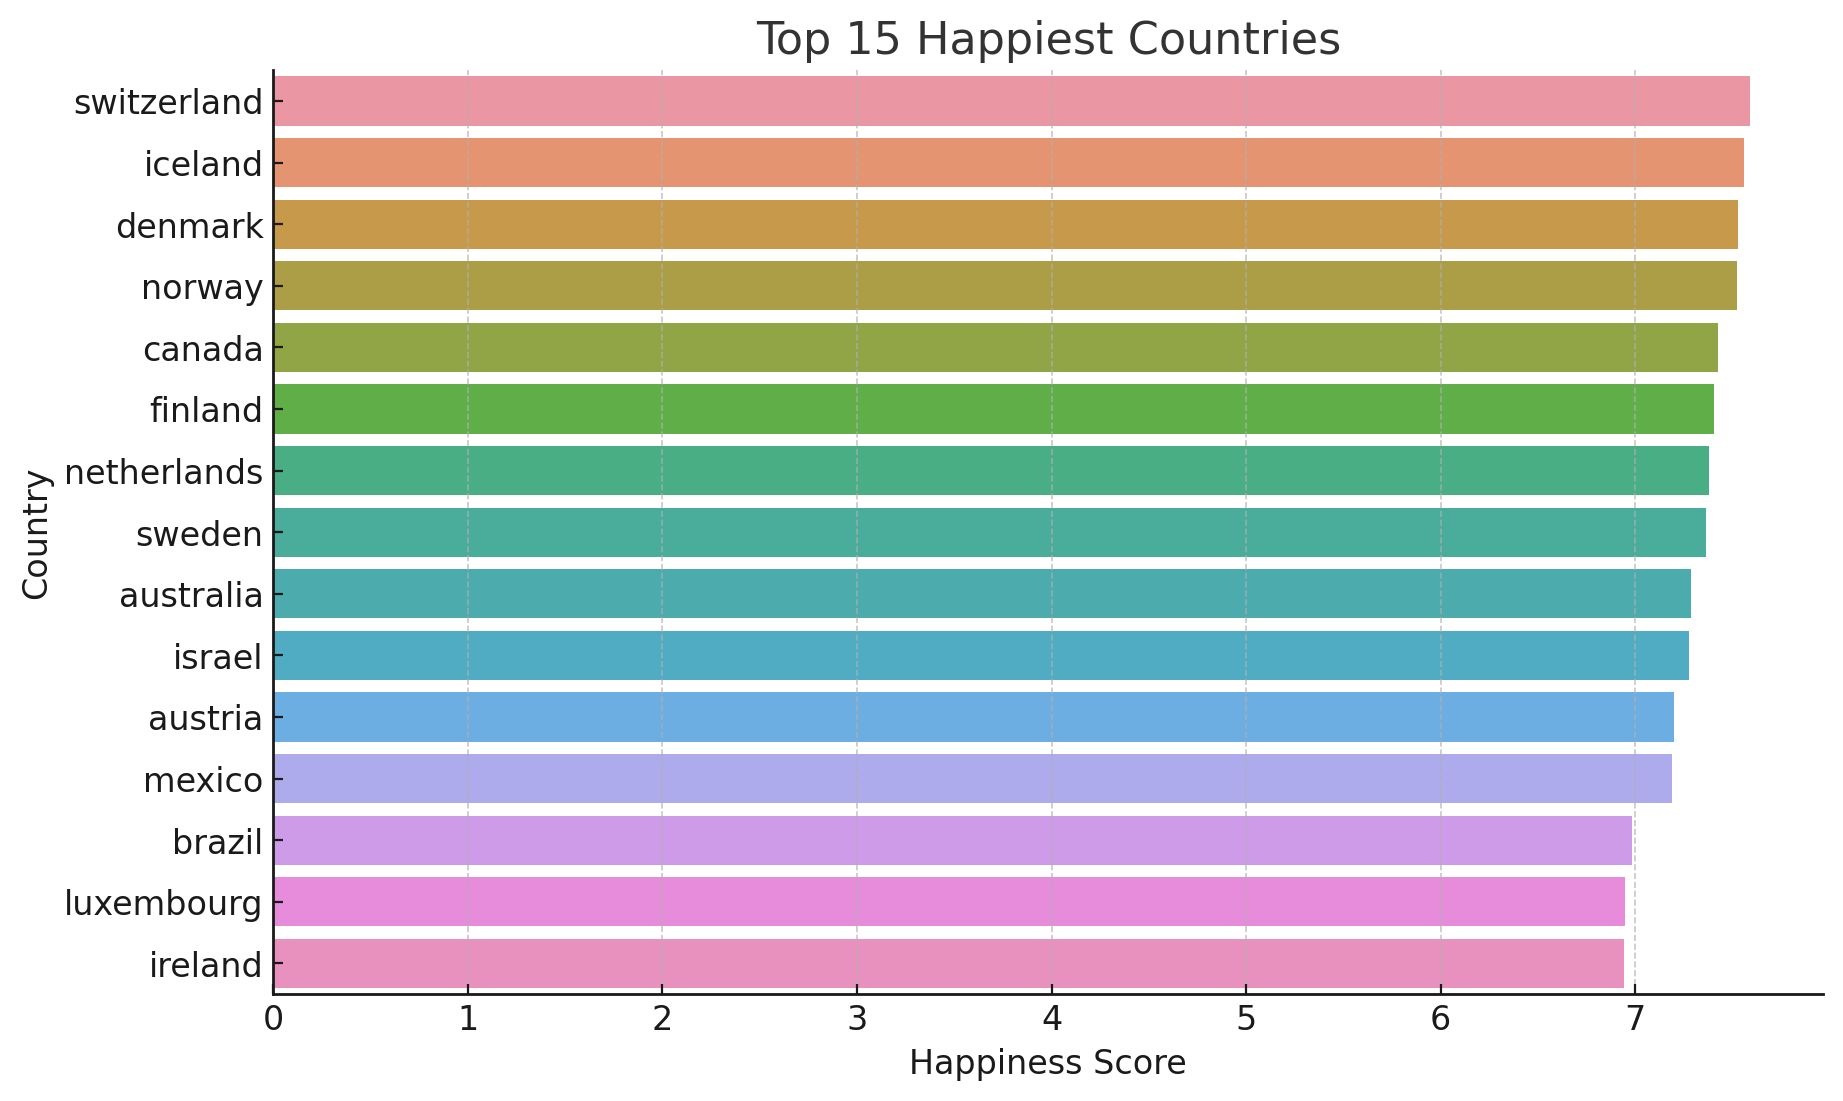

In [4]:
top15 = merged_df.sort_values(by='Happiness Score', ascending=False).head(15)
sns.barplot(data=top15, y='Country', x='Happiness Score')
plt.title('Top 15 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


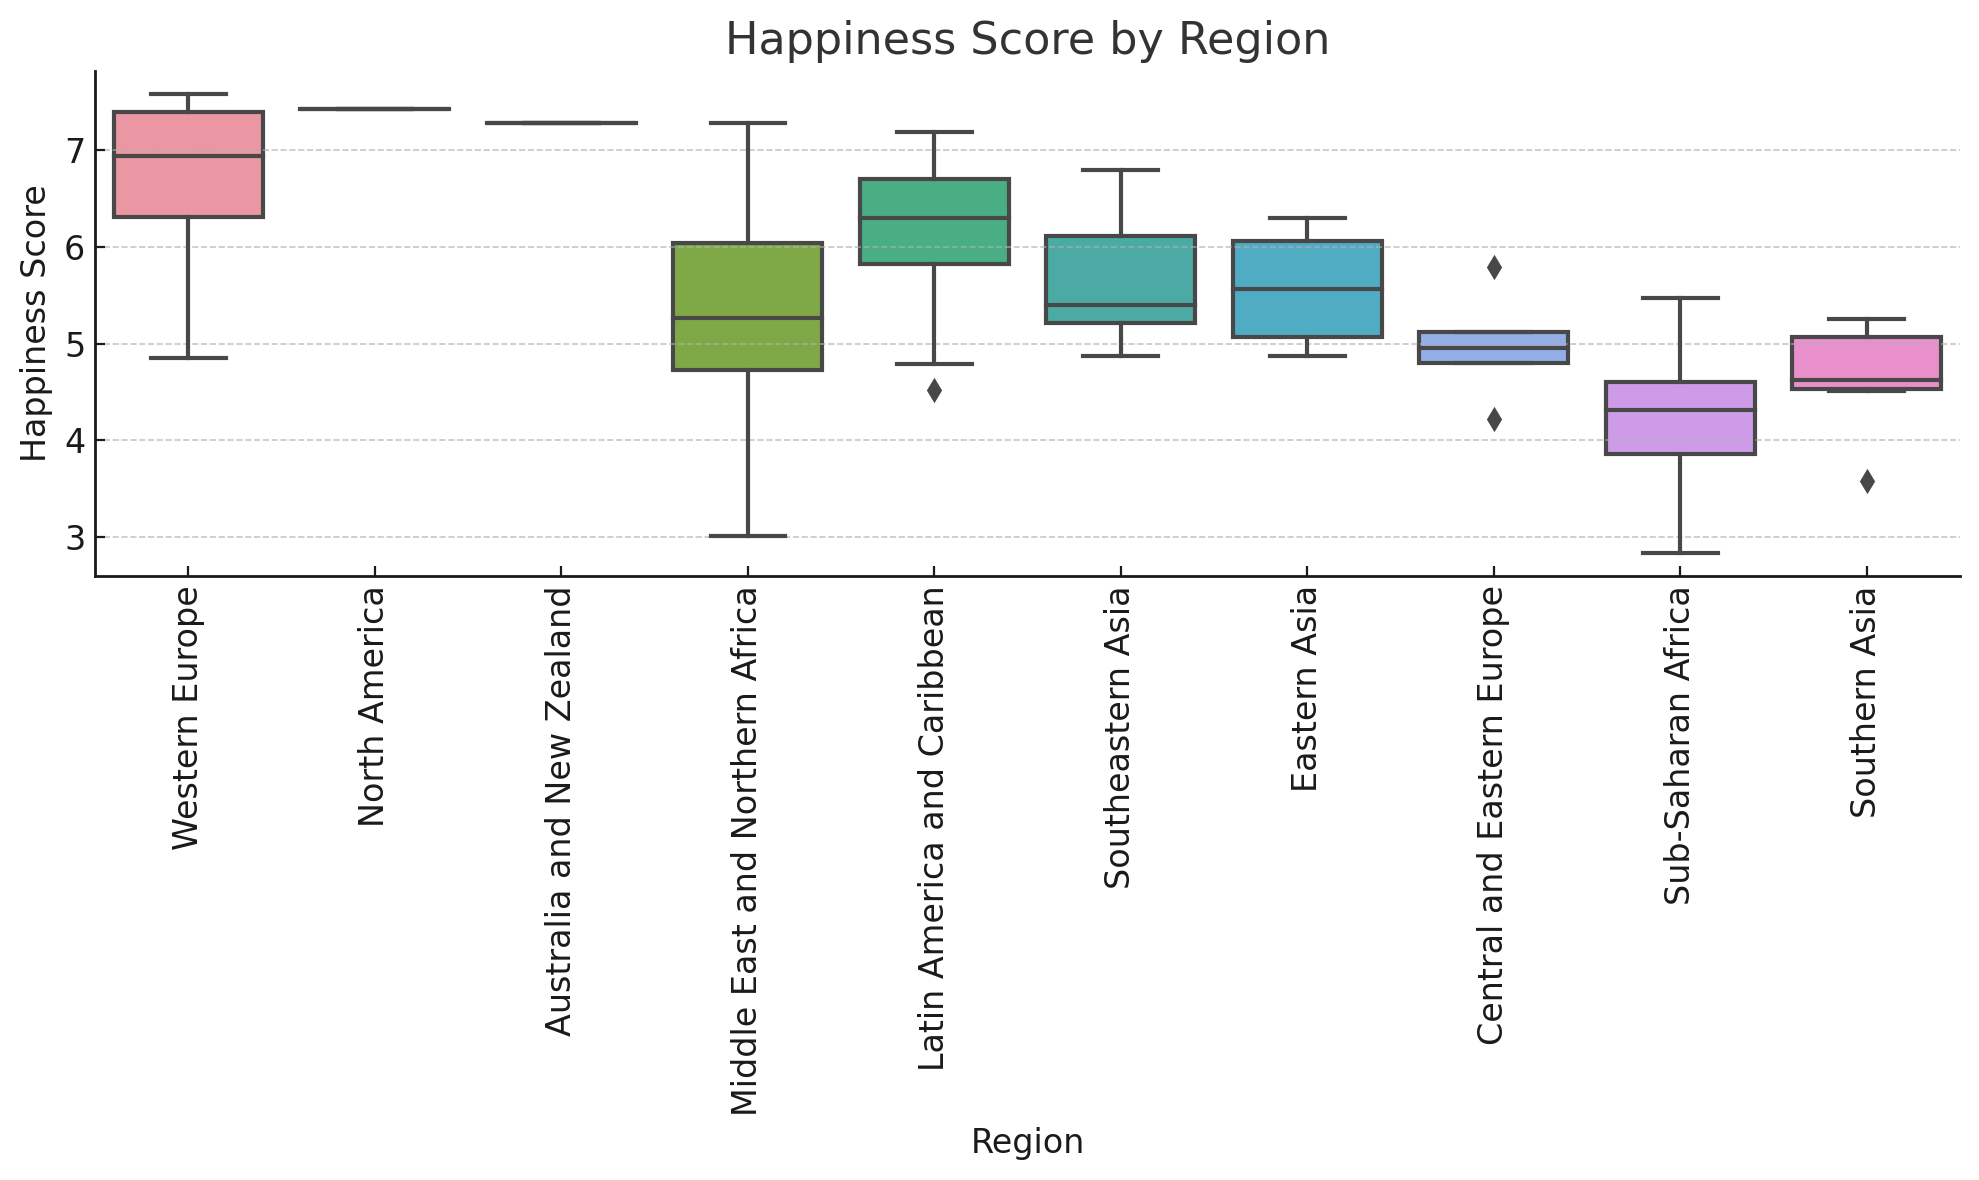

In [5]:
sns.boxplot(data=merged_df, x='Region', y='Happiness Score')
plt.xticks(rotation=90)
plt.title('Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()


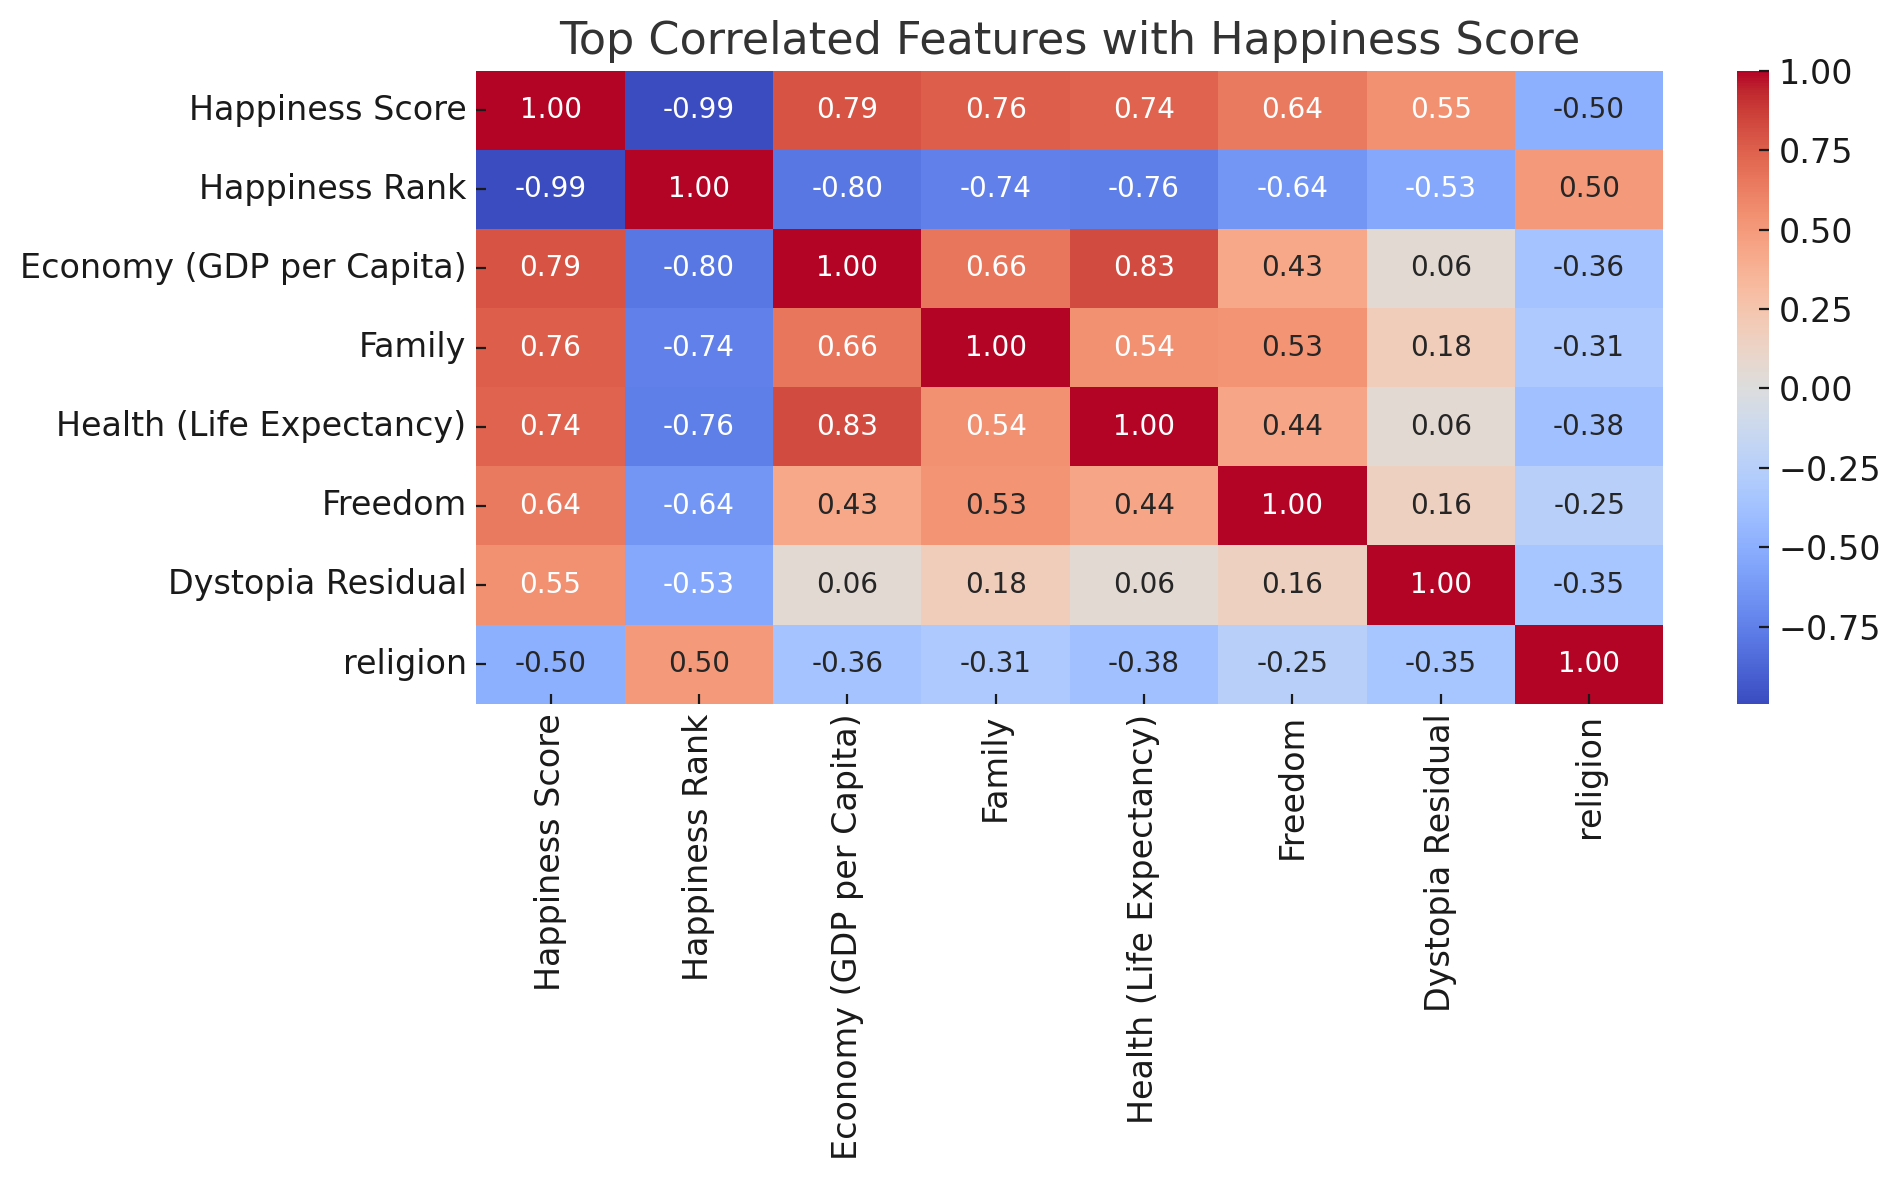

In [6]:
corr_matrix = merged_df.select_dtypes(include='number').corr()
top_corr_features = corr_matrix['Happiness Score'].abs().sort_values(ascending=False).head(8).index
filtered_corr = corr_matrix.loc[top_corr_features, top_corr_features]

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top Correlated Features with Happiness Score')
plt.tight_layout()
plt.show()


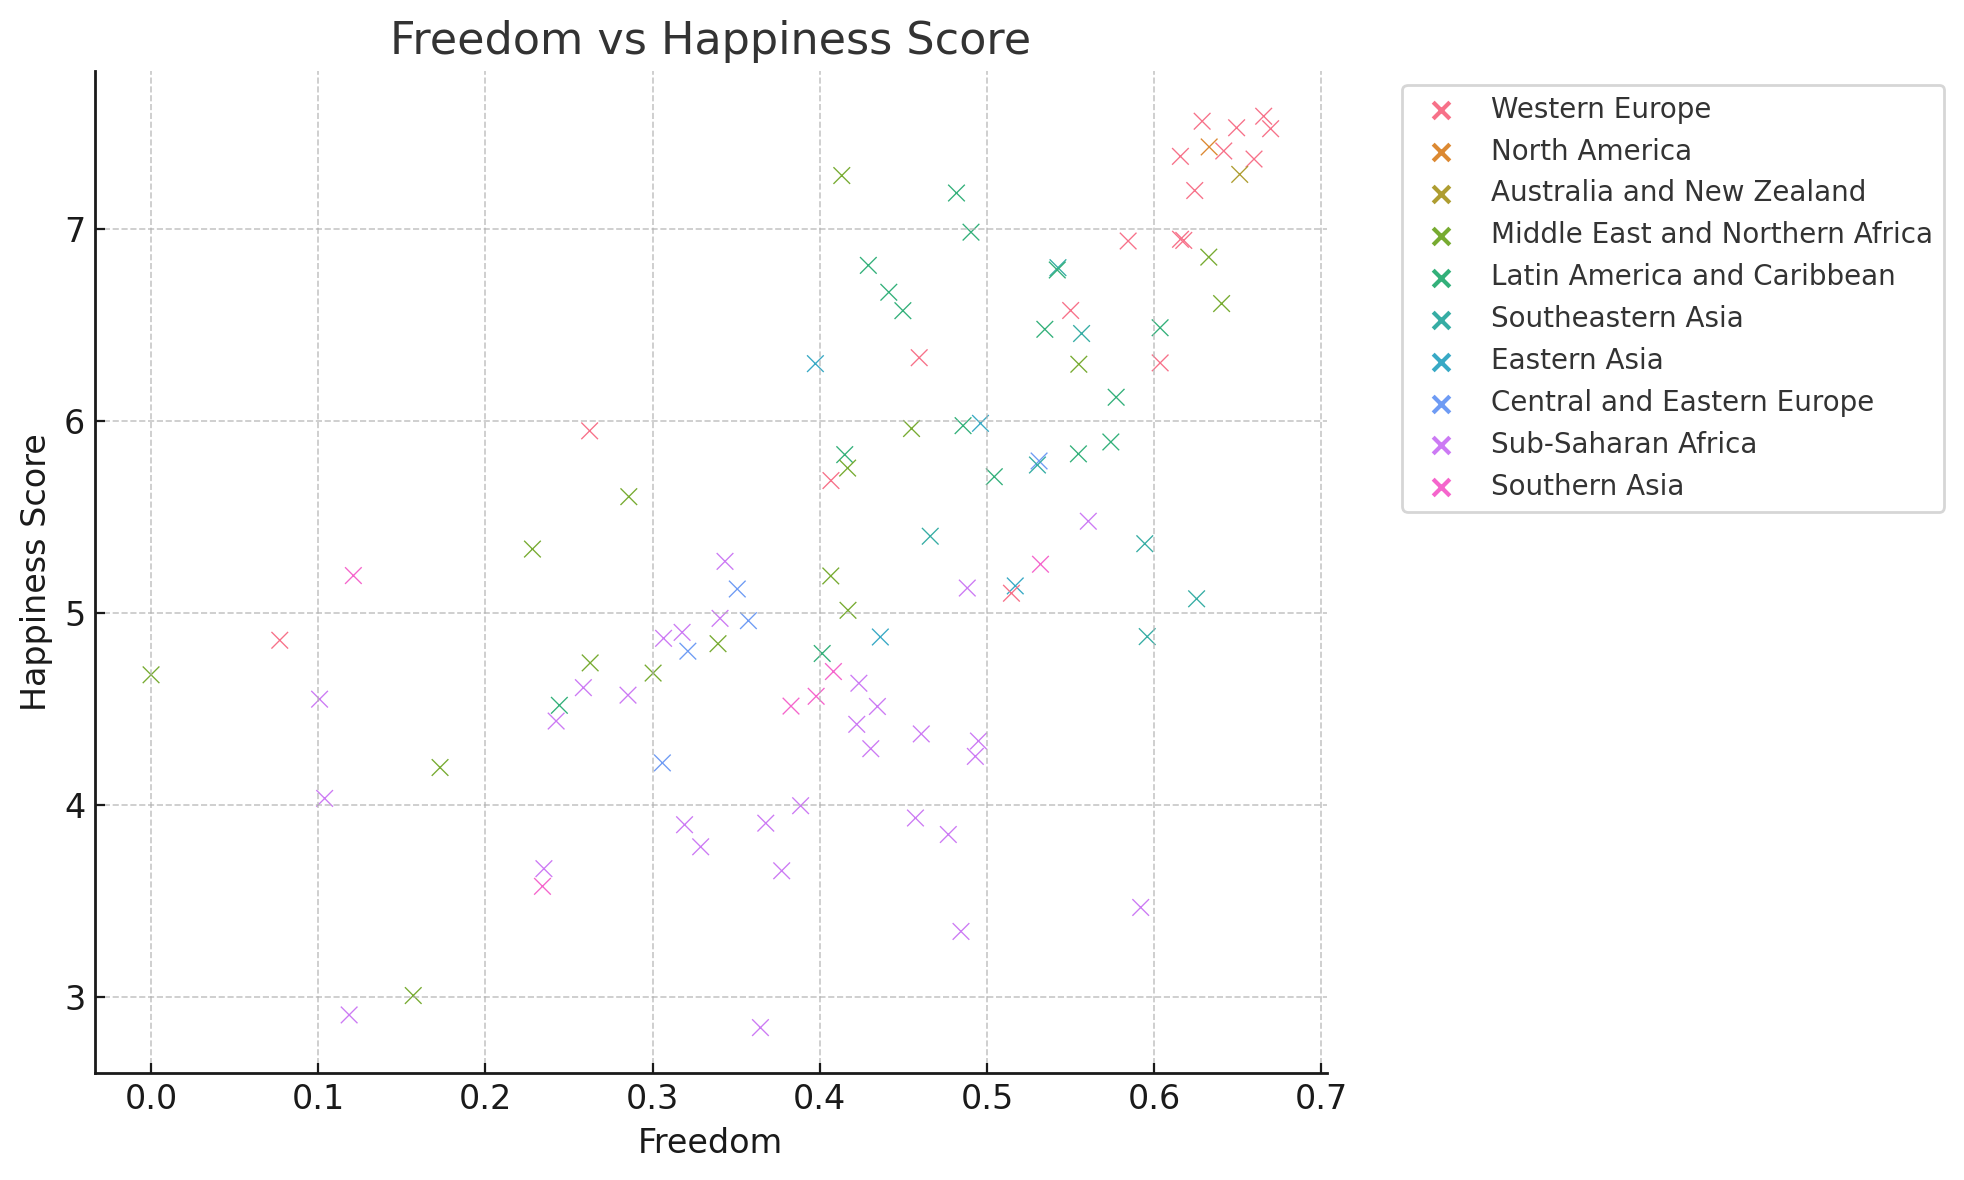

Hypothesis Testing: Freedom vs Happiness Score
Correlation Coefficient (r): 0.6429
p-value: 0.0000


In [7]:
sns.scatterplot(data=merged_df, x='Freedom', y='Happiness Score', hue='Region')
plt.title('Freedom vs Happiness Score')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

r_value, p_value = pearsonr(merged_df['Freedom'], merged_df['Happiness Score'])
print(f'Hypothesis Testing: Freedom vs Happiness Score')
print(f'Correlation Coefficient (r): {r_value:.4f}')
print(f'p-value: {p_value:.4f}')


In [8]:
feature_cols = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles',
                'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle',
                'icon', 'animate']
X = merged_df[feature_cols]
y = merged_df['Happiness Score']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R² Score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))


R² Score: 0.07615070020840953
MSE: 1.4619421108841688


In [11]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print('Cross-Validation R² Scores:', cv_scores)
print('Mean R² Score:', cv_scores.mean())


Cross-Validation R² Scores: [-43.56951685 -11.93423253 -12.62773014 -65.44267287 -13.35717905]
Mean R² Score: -29.386266290473657


In [12]:
comparison_df = X_test.copy()
comparison_df['Actual Happiness'] = y_test
comparison_df['Predicted Happiness'] = y_pred
comparison_df['Country'] = merged_df.loc[y_test.index, 'Country'].values
comparison_df['Error'] = abs(comparison_df['Actual Happiness'] - comparison_df['Predicted Happiness'])
sample_results = comparison_df[['Country', 'Actual Happiness', 'Predicted Happiness', 'Error']].sort_values(by='Error', ascending=False).head(3)
sample_results


,Country,Actual Happiness,Predicted Happiness,Error
65,greece,4.857,7.376428,2.519428
12,brazil,6.983,4.921150,2.061850
18,singapore,6.798,5.010921,1.787079
